**Projeto de Segmentação de Clientes**

O presente projeto visa exemplificar uma aplicação de um modelo de Machine Learning para segmentar uma base de clientes fictícia em três grupos com base na idade de cada cliente, renda anual e pontuação de gastos.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print("Versão da Linguagem Python usada neste VS Code:", python_version())

Versão da Linguagem Python usada neste VS Code: 3.14.2


**Instalação dos Pacotes Necessários**

In [2]:
!pip install -q pandas

In [3]:
!pip install -q scikit-learn

In [21]:
!pip install -q matplotlib

**Importações**

In [22]:
# Imports
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


**Importação dos Dados**

In [6]:
# Carrega os dados
df_clientes = pd.read_csv(r"C:\Users\acer\Downloads\ML segmentação de clientes\dados\dados_clientes.csv")

In [7]:
type(df_clientes)

pandas.core.frame.DataFrame

In [8]:
df_clientes.head(5)

,id,idade,renda_anual,pontuacao_gastos
0,1,56,94740,90
1,2,69,136352,50
2,3,46,86617,62
3,4,32,114841,97
4,5,60,36896,51


**Análise Exploratória dos Dados**

In [10]:
# Resumo estatístico
df_clientes[["idade", "renda_anual","pontuacao_gastos"]].describe().round(0)

,idade,renda_anual,pontuacao_gastos
count,500.0,500.0,500.0
mean,45.0,81557.0,49.0
std,15.0,36764.0,30.0
min,18.0,20384.0,0.0
25%,32.0,49173.0,24.0
50%,45.0,79219.0,48.0
75%,57.0,113017.0,73.0
max,70.0,149695.0,100.0


**Pré-Processamento dos Dados**

In [11]:
# Criar o padronizador dos dados
padronizador = StandardScaler()

In [12]:
# Aplica o padronizador somente nas colunas de interesse
dados_padronizados = padronizador.fit_transform(df_clientes[["idade","renda_anual","pontuacao_gastos"]])

In [13]:
# Vizualiza os dados
print(dados_padronizados)

[[ 0.74012478  0.35893538  1.40506904]
 [ 1.59401387  1.49192537  0.05039391]
 [ 0.08328703  0.13776654  0.45679645]
 ...
 [-0.31081563  0.32661636  0.18586143]
 [-1.23038848 -1.48706069  1.43893592]
 [-1.03333716 -0.96992912 -0.59307677]]


**Construção do Modelo de Machine Learning Para Segmentação de Clientes**

In [14]:
# Difinição do número de clusters (k)
k = 3

In [15]:
# Criação do modelo k-means
kmeans = KMeans(n_clusters = k)

In [16]:
# Treinamento do modelo com os dados padronizados 
kmeans.fit(dados_padronizados)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [17]:
# Atribuição dos rótulos dos clusters aos clientes
df_clientes['cluster'] = kmeans.labels_

In [18]:
# Exibe o resultado (5 primeiras linhas)
df_clientes.head(5)

,id,idade,renda_anual,pontuacao_gastos,cluster
0,1,56,94740,90,0
1,2,69,136352,50,1
2,3,46,86617,62,0
3,4,32,114841,97,1
4,5,60,36896,51,0


In [40]:
type(media_idade)

pandas.core.series.Series

**Análise Exploratória de Dados dos Clusters**

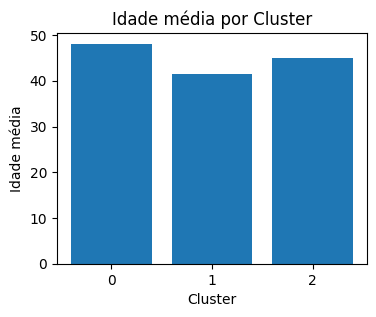

In [ ]:
# Média de idade por cluster
media_idade = df_clientes.groupby('cluster')['idade'].mean()

plt.figure(figsize=(4, 3))

plt.bar(media_idade.index, media_idade.values)

plt.xticks(media_idade.index)

plt.ylabel("Idade média")
plt.xlabel("Cluster")
plt.title("Idade média por Cluster")
plt.show()

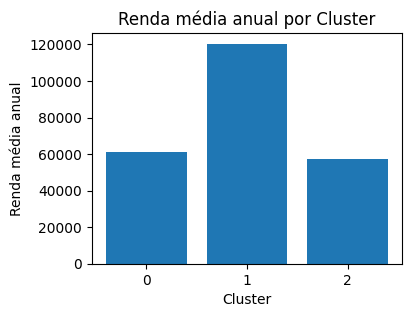

In [41]:
# Média de renda por cluster
media_renda_anual = df_clientes.groupby('cluster')['renda_anual'].mean()

plt.figure(figsize=(4, 3))

plt.bar(media_renda_anual.index, media_renda_anual.values)

plt.xticks(media_renda_anual.index)

plt.ylabel("Renda média anual")
plt.xlabel("Cluster")
plt.title("Renda média anual por Cluster")
plt.show()

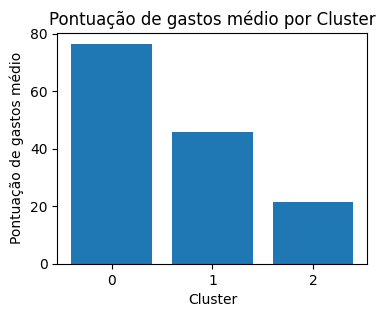

In [39]:
# Média de pontos de gastos por cluster
media_pontos_gastos = df_clientes.groupby('cluster')['pontuacao_gastos'].mean()

plt.figure(figsize=(4, 3))

plt.bar(media_pontos_gastos.index, media_pontos_gastos.values)

plt.xticks(media_pontos_gastos.index)

plt.ylabel("Pontuação de gastos médio")
plt.xlabel("Cluster")
plt.title("Pontuação de gastos médio por Cluster")
plt.show()

In [23]:
# Salva os resultados
df_clientes.to_csv(r'C:\Users\acer\Downloads\2-Cap16\dados\segmentos.csv', index = False)